In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import numpy as np
from IPython.display import display

In [2]:
path = '../output/exp2210/'
all_files = glob.glob(path + "/*.csv")
dfs = [pd.read_csv(f) for f in all_files]
df = pd.concat(dfs, ignore_index=True)
display(df)
success_df = df[df['result'] == 'Success']
polocm_success_df = success_df[success_df['dod'] >0]


,lo_id,dod,actual_dod,domain,index,num_objects,total_length,size,measurement,runtime,polocm_time,locm2_time,locm_time,accuracy,error_rate,executability,result
0,0,0.1,0.133333,sokoban,0,69,6,1,flex,0.928199,0.745080,0.076824,0.106294,0.980000,0.0100,1.000000,Success
1,21,0.1,0.127273,spanner,0,13,11,1,flex,1.600216,1.456774,0.059434,0.084009,0.930556,0.0125,0.818182,Success
2,1,0.1,0.159206,sokoban,0,66,36,5,flex,1.727554,1.610991,0.041350,0.075214,1.000000,0.0000,1.000000,Success
3,14,0.1,0.161317,sokoban,0,69,87,10,flex,4.594162,4.457272,0.048408,0.088482,1.000000,0.0000,0.993333,Success
4,2,0.1,0.167381,sokoban,0,69,73,10,flex,3.853586,3.708112,0.054706,0.090767,1.000000,0.0000,1.000000,Success
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738,188,0.2,0.205813,childsnack,0,35,236,10,flex,3000.000000,1200.000000,1200.000000,600.000000,0.000000,0.0000,0.000000,Timeout: Could not complete polocm in 600 seco...
739,173,0.2,0.217724,ferry,0,22,450,10,flex,3000.000000,1200.000000,1200.000000,600.000000,0.000000,0.0000,0.000000,Timeout: Could not complete polocm in 600 seco...
740,194,0.2,0.204931,childsnack,0,34,562,25,flex,3000.000000,1200.000000,1200.000000,600.000000,0.000000,0.0000,0.000000,Timeout: Could not complete polocm in 600 seco...
741,174,0.2,0.213277,ferry,0,21,937,21,flex,3000.000000,1200.000000,1200.000000,600.000000,0.000000,0.0000,0.000000,Timeout: Could not complete polocm in 600 seco...


/tmp/ipykernel_217183/2806246821.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(index=pd.cut(df['total_length'], np.linspace(df['total_length'].min(), df['total_length'].max(), 10)),


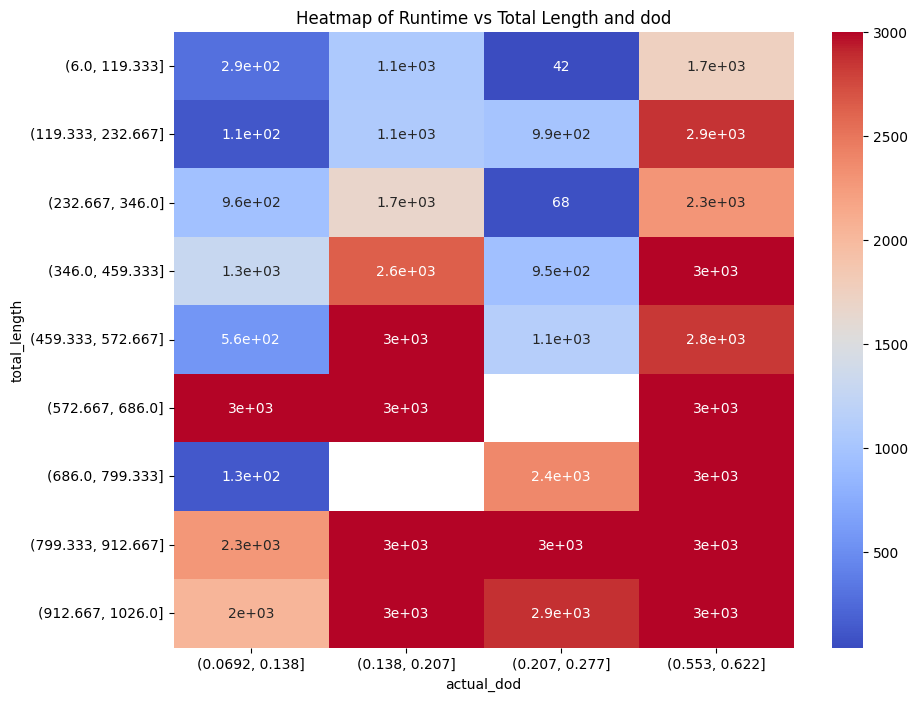

In [3]:
pivot_table = df.pivot_table(index=pd.cut(df['total_length'], np.linspace(df['total_length'].min(), df['total_length'].max(), 10)), 
                             columns=pd.cut(df['actual_dod'], np.linspace(df['actual_dod'].min(), df['actual_dod'].max(), 10)), 
                             values='runtime', aggfunc='mean')

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title('Heatmap of Runtime vs Total Length and dod')
plt.show()

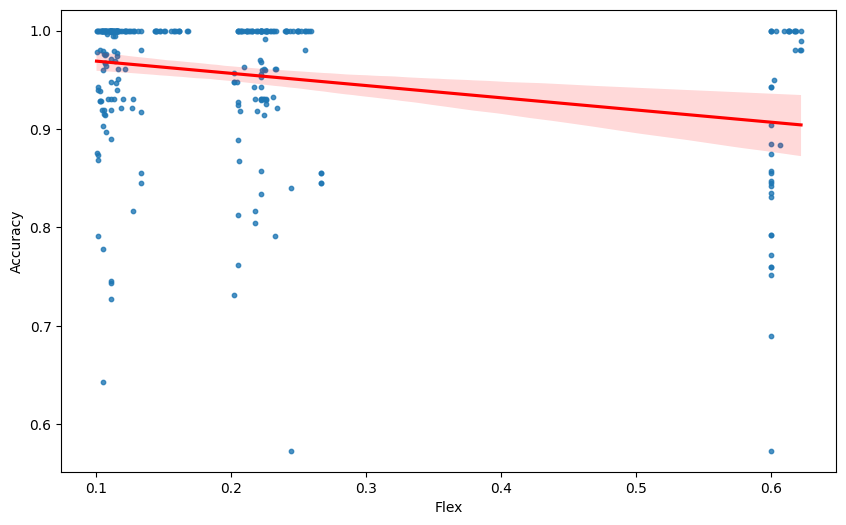

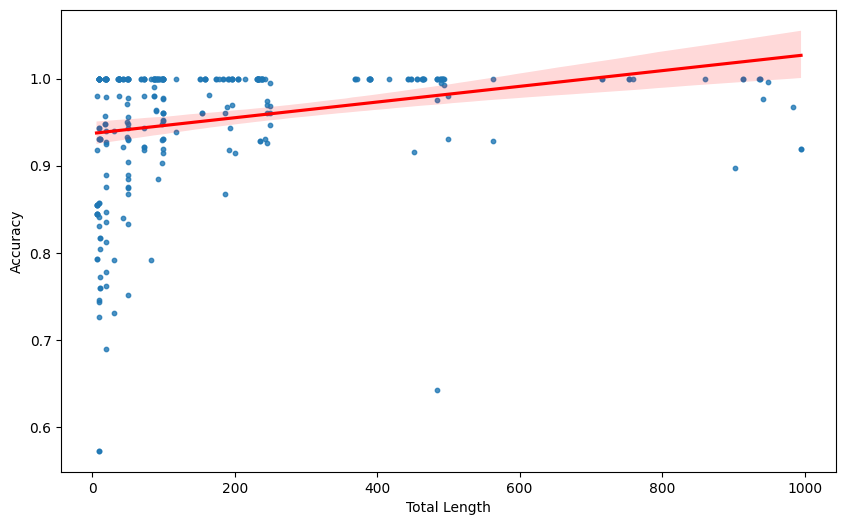

In [4]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatter plot with regression line
sns.regplot(x='actual_dod', y='accuracy', data=polocm_success_df, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.xlabel('Flex')
plt.ylabel('Accuracy')
plt.show()

# You can do the same for total_length
plt.figure(figsize=(10, 6))
sns.regplot(x='total_length', y='accuracy', data=polocm_success_df, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.xlabel('Total Length')
plt.ylabel('Accuracy')
plt.show()



/tmp/ipykernel_217183/4145096197.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = polocm_success_df.pivot_table(index=pd.cut(polocm_success_df['total_length'], np.linspace(polocm_success_df['total_length'].min(), polocm_success_df['total_length'].max(), 10)),


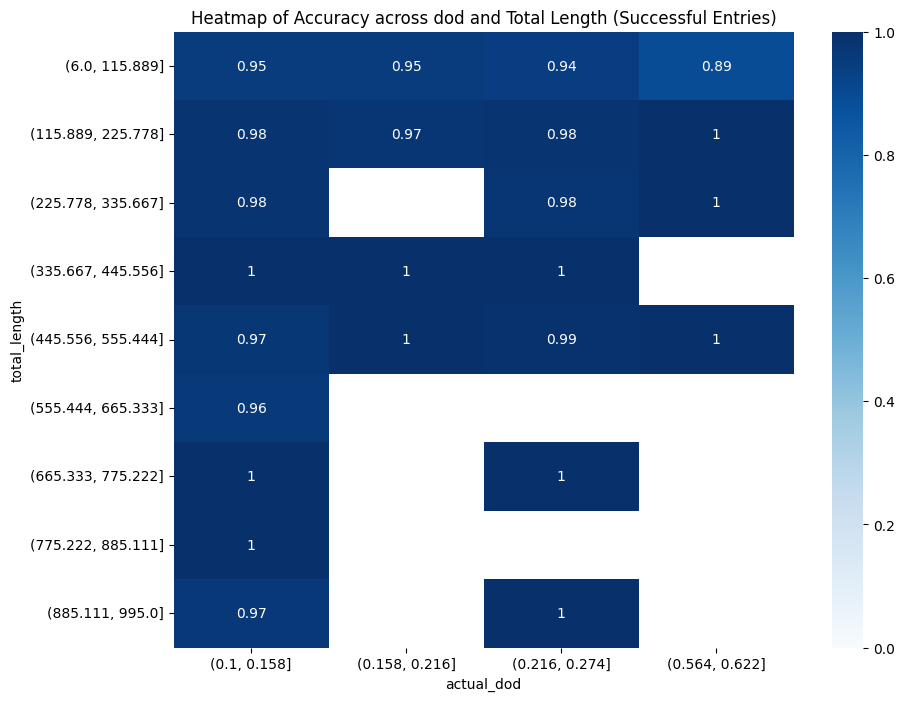

In [5]:
# Create a pivot table for the heatmap
pivot_table = polocm_success_df.pivot_table(index=pd.cut(polocm_success_df['total_length'], np.linspace(polocm_success_df['total_length'].min(), polocm_success_df['total_length'].max(), 10)), 
                                        columns=pd.cut(polocm_success_df['actual_dod'], np.linspace(polocm_success_df['actual_dod'].min(), polocm_success_df['actual_dod'].max(), 10)), 
                                        values='accuracy', aggfunc='mean')

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='Blues', vmin=0, vmax=1)
plt.title('Heatmap of Accuracy across dod and Total Length (Successful Entries)')
plt.show()

<Figure size 1200x800 with 0 Axes>

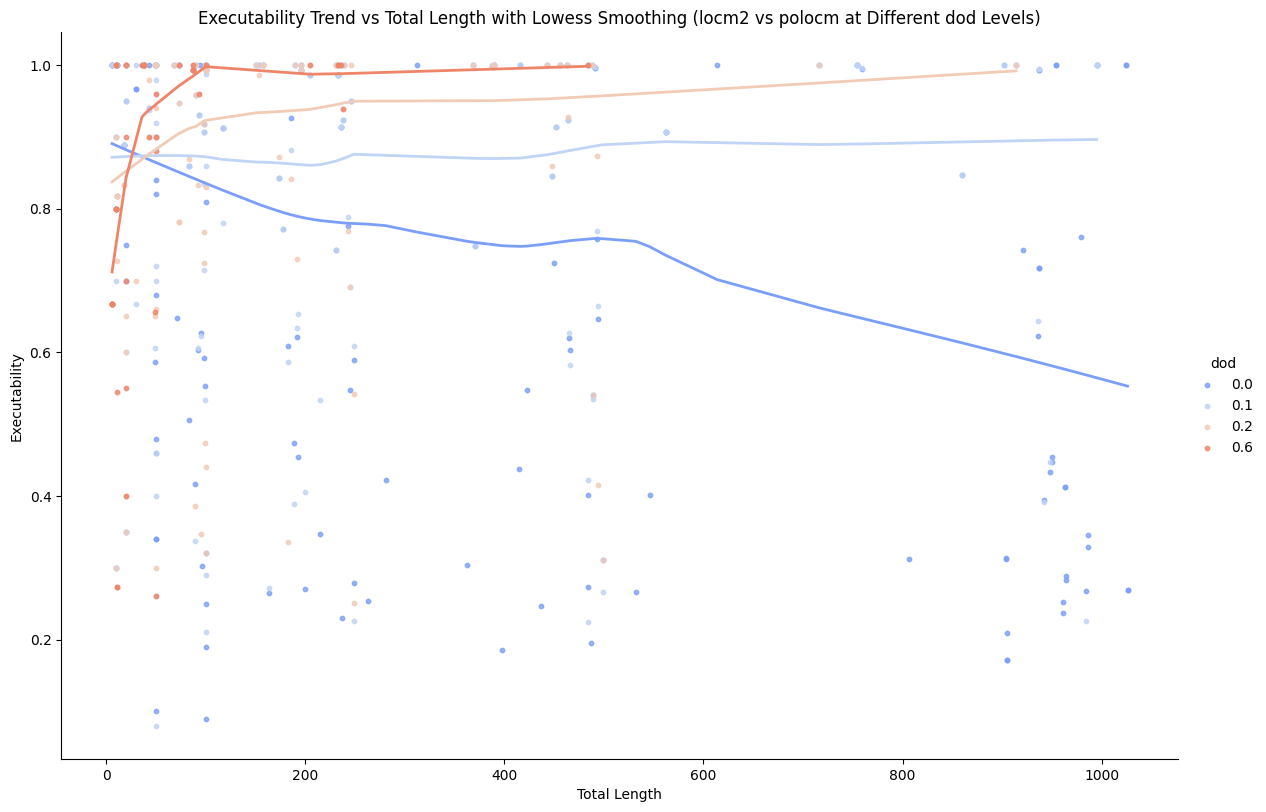

In [6]:


plt.figure(figsize=(12, 8))

# Apply lowess smoothing for each dod value
sns.lmplot(x='total_length', y='executability', hue='dod', data=success_df, height=8, aspect=1.5, lowess=True, scatter_kws={'s':10}, line_kws={'lw':2}, palette='coolwarm')

plt.title('Executability Trend vs Total Length with Lowess Smoothing (locm2 vs polocm at Different dod Levels)')
plt.xlabel('Total Length')
plt.ylabel('Executability')
plt.show()





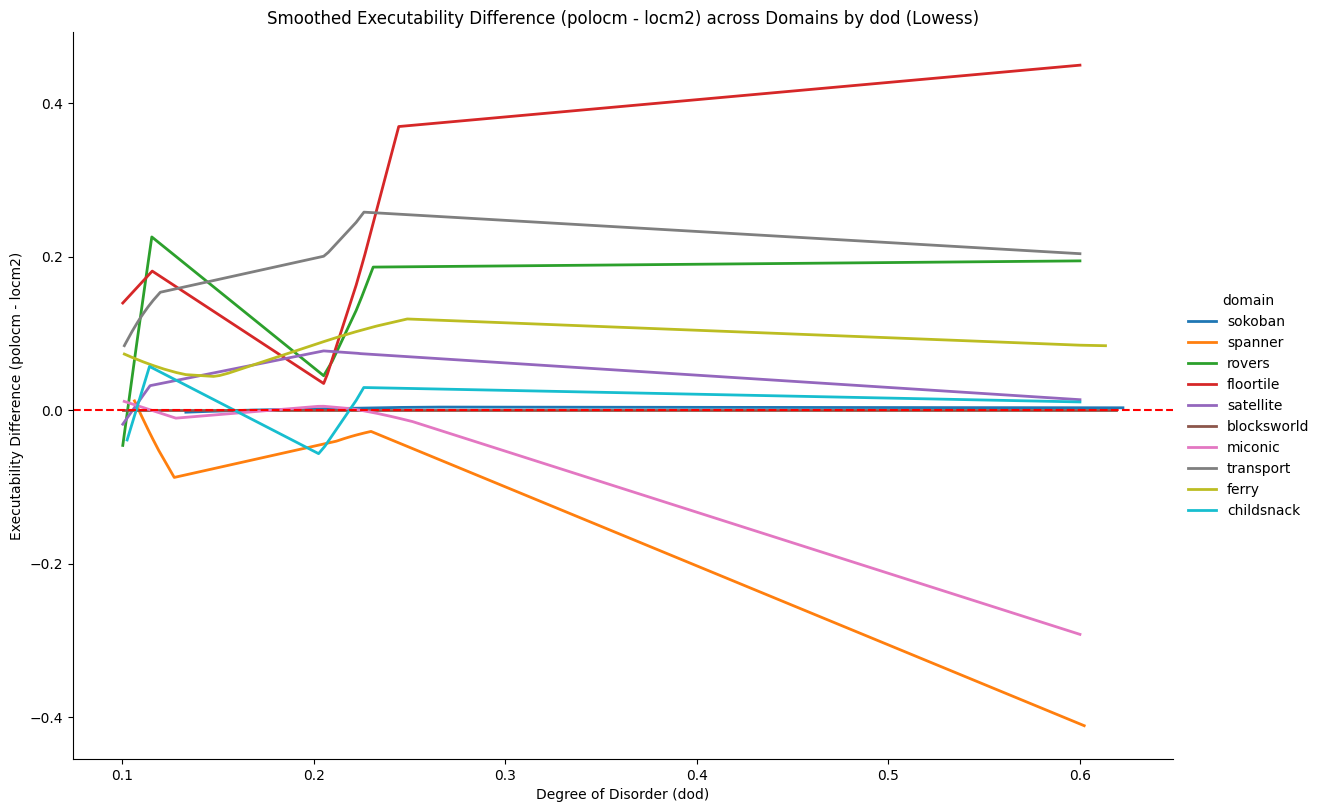

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Filter the DataFrame for successful results only
df_success = df[df['result'] == "Success"].copy()

# Step 2: Split the data into locm2 and polocm tables
df_locm2 = df_success[df_success['dod'] == 0]
df_polocm = df_success[df_success['dod'] > 0]

# Step 3: Merge locm2 and polocm on 'domain' to compare executability
df_merged = pd.merge(df_polocm, df_locm2, on=['domain', 'lo_id'], suffixes=('_polocm', '_locm2'))

# Step 4: Calculate the difference in executability (polocm - locm2)
df_merged['executability_diff'] = df_merged['executability_polocm'] - df_merged['executability_locm2']

# Step 5: Use lmplot with lowess for smoothing
sns.lmplot(x='actual_dod_polocm', y='executability_diff', hue='domain', data=df_merged, height=8, aspect=1.5, scatter=False,
           lowess=True, line_kws={'lw': 2}, palette='tab10')

# Step 6: Add title and axis labels
plt.title('Smoothed Executability Difference (polocm - locm2) across Domains by dod (Lowess)')
plt.xlabel('Degree of Disorder (dod)')
plt.ylabel('Executability Difference (polocm - locm2)')
plt.axhline(0, color='red', linestyle='--', label='locm2 Baseline')
plt.show()


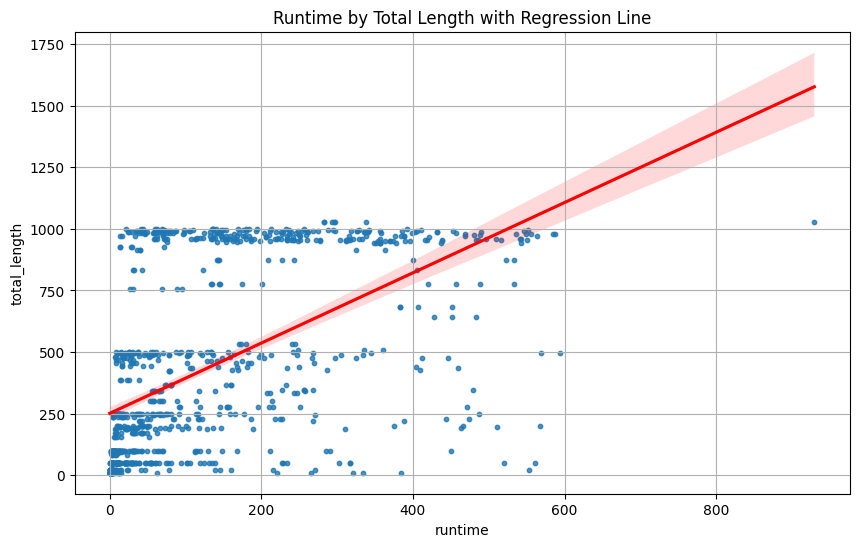

In [11]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=data, x='runtime', y='total_length', scatter_kws={'s': 10}, line_kws={"color": "red"})

# Titles and labels
plt.title('Runtime by Total Length with Regression Line')
plt.xlabel('runtime')
plt.ylabel('total_length')


plt.grid(True)
plt.show()

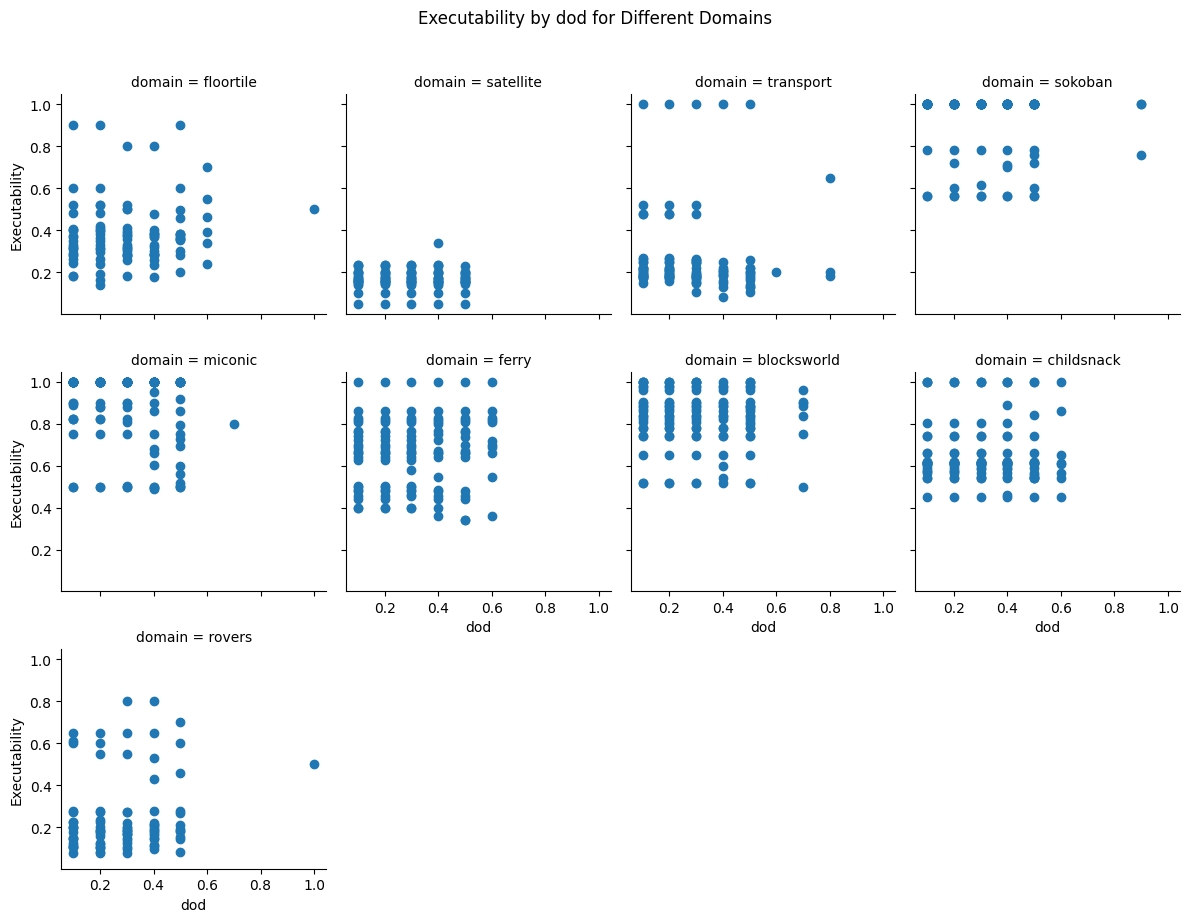

In [12]:
# Step 2: Create a faceted plot, where each subplot corresponds to one domain
g = sns.FacetGrid(data, col='domain', col_wrap=4, height=3)
g = g.map(plt.scatter, 'dod', 'executability', marker='o')

# Step 3: Add titles and adjust the layout
g.fig.suptitle('Executability by dod for Different Domains', y=1.02)
g.set_axis_labels('dod', 'Executability')

plt.tight_layout()
plt.show()

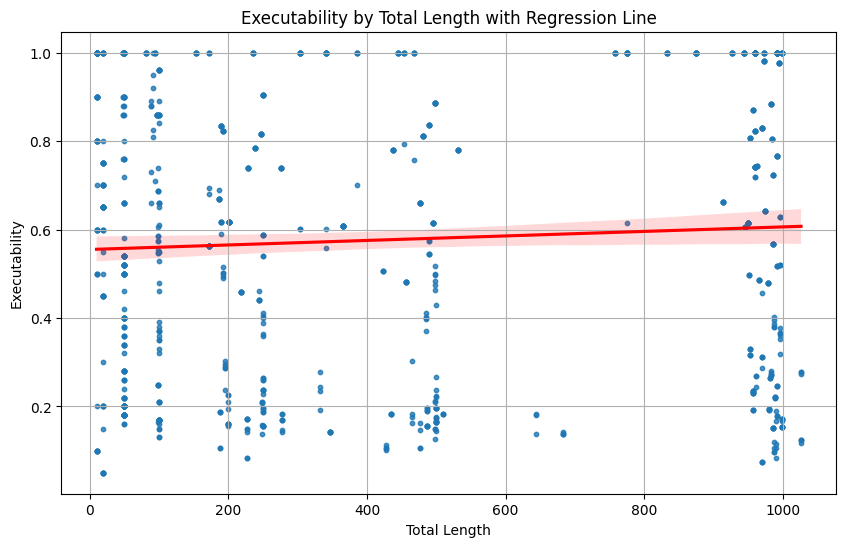

In [13]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=data, x='total_length', y='executability', scatter_kws={'s': 10}, line_kws={"color": "red"})

# Titles and labels
plt.title('Executability by Total Length with Regression Line')
plt.xlabel('Total Length')
plt.ylabel('Executability')


plt.grid(True)
plt.show()